<a href="https://colab.research.google.com/github/GerardoMunoz/PresentacionesAlgebraLineal/blob/main/An%C3%A1lisisComponentesPrincipales_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation,rc
from mpl_toolkits.mplot3d import Axes3D


def ejes3d(x0,y0,z0,x1,y1,z1,ejes='x'):
    #fig=plt.figure(figsize=(8,6),dpi=80)
    #ax = plt.Axes(fig,[0.,0.,1.,1.])
    fig = plt.figure()
    ax = Axes3D(fig)
    #fig=plt.figure()
    #ax=fig.add_subplot(111,projection='3d')
    ax.set_xlim([x0,x1])
    ax.set_ylim([y0,y1])
    ax.set_zlim([z0,z1])
    ax.set_xlabel('$'+ejes+'_0$')
    ax.set_ylabel('$'+ejes+'_1$')
    ax.set_zlabel('$'+ejes+'_2$')
    punto3d(ax,(0,0,0),nombre=r'$\vec{0}$')

    return fig,ax

#def animacion_paso_3d(ax):
#    return lambda i: ax.view_init(elev=10., azim=i)

def dibujo():                           # En esta rutina se colocan los puntos y líneas para la animación
    return fig,    

def animacion_paso_3d(ax,fig,angulo):
    ax.view_init(elev=10., azim=angulo)
    return fig, 

def animacion3d(fig,ax,dibujo=dibujo, fps=20, segundos=2):
    plt.close(fig)
    rc('animation', html='jshtml')
    frames=fps*segundos
    return animation.FuncAnimation(fig, lambda i : animacion_paso_3d(ax,fig,i/frames*90), init_func=dibujo,
                               frames=frames, interval=int(1000/fps), blit=True)

def linea3d(ax,u,v=(0,0,0),color='k',**kwargs):
    ax.plot((u[0],v[0]),(u[1],v[1]),(u[2],v[2]),color)

def plano3d(ax,u,v,color='k',**kwargs):
    x_min,x_max=ax.get_xlim()
    y_min,y_max=ax.get_ylim()
    det=u[0]*v[1]-u[1]*v[0]
    kx=(v[1]*u[2]-u[1]*v[2])/det
    ky=-(v[0]*u[2]-u[0]*v[2])/det

    xx=[[x_min,x_max],[x_min,x_max]]
    yy=[[y_min,y_min],[y_max,y_max]]
    zz=np.array([[kx*x_min+ky*y_min,kx*x_max+ky*y_min],[kx*x_min+ky*y_max,kx*x_max+ky*y_max]]).astype(np.float64)

    ax.plot_surface(xx, yy, zz, alpha=0.2)
    #ax.scatter(u[0], u[1], u[2], color='green')
    #ax.scatter(v[0], v[1], v[2], color='green')

    
def punto3d(ax,v,nombre='',fontsize=15, c="goldenrod",**kwargs):
    ax.scatter(v[0],v[1],float(v[2]), marker='o', s=20, c="goldenrod", alpha=0.6)
    if nombre!='':
        ax.text(v[0],v[1],v[2],nombre,fontsize=fontsize)        

def p(v):
    return '('+', '.join([str(ai) for ai in v])+')\u209c'

In [ ]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [ ]:
#palabras=['perro','gato','burro','yegua','oveja','vaca']
palabras=['rapido','veloz','despacio','lento','fugaz','eterno']

In [ ]:
!python -m spacy download es_core_news_sm

     |████████████████████████████████| 16.2 MB 9.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
# Si tiene un error aquí, recomiendo reiniciar el entorno de ejecución y volver a ejecutar todo.
import spacy
spacy_es = spacy.load("es_core_news_sm")
casa=spacy_es("casa").vector
casa

array([ 5.624448  , -0.677225  ,  0.17657495, -2.8591723 ,  4.5836306 ,
       -2.522374  , -5.9017143 ,  2.9747756 ,  5.729942  ,  1.8605539 ,
        3.2116938 ,  2.2673926 , -2.1339498 ,  1.9373713 , -5.7996664 ,
        3.738872  , -3.169919  , -1.1433076 , -1.1286906 ,  3.7218804 ,
        0.59530246, -6.8313303 ,  7.7033825 ,  3.6160295 , -2.9236698 ,
       -2.9658625 , -0.80769455, -1.9993533 ,  1.6672248 , -2.9122794 ,
       -0.14740765, -1.6012373 , -0.47115165, -1.6351167 ,  3.514541  ,
       -2.743211  ,  3.8078372 ,  2.342674  ,  2.7728333 , -2.9658773 ,
        0.25084922,  2.0193632 , -7.449494  , -2.7583447 , -4.0080357 ,
       -0.5204321 , -4.256772  , -2.029664  , -2.7167475 , -2.199893  ,
        1.6142025 ,  4.302027  ,  2.0183744 , -4.828782  , -2.311955  ,
        8.003496  , -2.8297493 ,  2.9239445 ,  2.7424142 , -2.0704226 ,
        2.2407944 , -0.10615522, -1.7269354 , -4.407348  , -1.6051787 ,
       -0.94151944,  0.1400764 , -2.8877802 ,  2.2088618 , -0.37

In [ ]:
type(casa)

numpy.ndarray

In [ ]:
casa.shape

(96,)

In [ ]:
incrustaciones_96= np.concatenate([spacy_es(palabra).vector.reshape(96,1) for palabra in palabras],axis=1)
#palabras_array = np.concatenate(( for palabra in palabras),axis=1)
incrustaciones_96.shape

(96, 6)

In [ ]:
#v1=modelo.get_vector(palabras)
incrustaciones_96[0,:]

array([6.024719 , 1.3673272, 4.742387 , 5.683687 , 5.0291557, 2.4453073],
      dtype=float32)

# PCA para proyectar de 2 dimensiones a una dimensión 

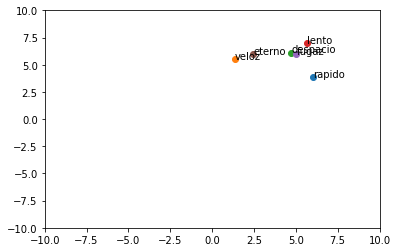

In [ ]:
plt.axis([-10,10,-10,10])
for i in range(len(palabras)):
    plt.scatter(incrustaciones_96[0,i],incrustaciones_96[1,i])
    plt.text(incrustaciones_96[0,i],incrustaciones_96[1,i],palabras[i])

In [ ]:
palabras[0]

'rapido'

In [ ]:
incrustaciones_96[:,0]

array([ 6.0247192e+00,  3.8550570e+00, -3.6936433e+00,  7.1452582e-01,
        2.9654655e+00, -7.8491812e+00, -7.7832451e+00, -2.7047639e+00,
        2.6197150e+00, -2.0435576e+00,  3.2372124e+00, -5.5479020e-01,
       -4.9623494e+00,  2.8354425e+00, -4.5453906e-03, -7.5772423e-01,
        8.9486146e-01,  2.4269996e+00, -4.0914998e+00,  7.8449264e+00,
       -7.5450420e-01, -3.0828393e+00, -1.3647524e+00, -1.8306156e+00,
        2.4035823e+00, -1.0800242e+00, -4.3133440e+00, -3.5983286e+00,
       -1.0489931e+00, -3.0137272e+00, -3.2225567e-01, -6.9982643e+00,
        1.3227475e+00, -1.8769531e+00,  2.9519556e+00, -2.5571558e+00,
        2.8725977e+00, -3.1484110e+00, -5.4693761e+00,  1.7360470e+00,
        5.0267458e-01,  5.4139978e-01,  1.3828080e+00, -7.2958320e-01,
       -1.1845207e-01, -1.7037791e+00,  2.4829488e+00, -5.5733070e+00,
        4.6317819e-01, -2.2497392e-01, -2.1645179e+00,  6.5473189e+00,
        1.6373632e+00, -2.8043709e+00,  2.5510256e+00,  3.8055947e+00,
      

In [ ]:
num_coord = incrustaciones_96.shape[0]
num_coord

96

In [ ]:
eje=1
num_puntos = incrustaciones_96.shape[eje]
num_puntos

6

In [ ]:
promedio = 1/num_puntos * incrustaciones_96.sum(axis=eje)
promedio.shape

(96,)

In [ ]:
promedio

array([ 4.2154307 ,  5.7436666 , -3.9723098 , -1.9588346 ,  6.816602  ,
       -3.858737  , -5.904525  , -1.3319381 ,  3.3588638 ,  0.08606397,
        2.752273  ,  1.0778923 , -3.9406962 ,  0.70892215, -1.7801794 ,
        1.2684547 ,  0.39924812,  2.8350768 , -3.0796132 ,  3.2453487 ,
       -0.35976776, -3.3276572 ,  1.0578563 , -1.1693076 , -0.08946896,
       -0.76196736, -3.8785005 , -4.866722  , -2.079184  , -2.18383   ,
       -3.3711371 , -3.466164  ,  0.20553818, -3.6268709 ,  4.1677923 ,
       -1.0370818 ,  5.544275  , -3.5016108 , -0.14474544,  0.30190417,
        0.78185916,  1.128761  , -2.290557  , -1.7673142 , -0.6018928 ,
        0.9263977 , -1.0349882 , -1.0208488 ,  0.22627656, -0.2642759 ,
       -2.3337724 ,  4.0324507 ,  2.6545777 , -4.694187  , -0.7363349 ,
        3.6037483 , -1.7213571 ,  5.397869  ,  1.5147588 ,  0.29080063,
        0.73526037,  0.91597164,  0.6044638 , -1.1941116 ,  3.88778   ,
        0.8944888 ,  0.29987773, -0.9503838 ,  2.579242  , -0.27

Text(4.2154307, 5.7436666, 'PROMEDIO')

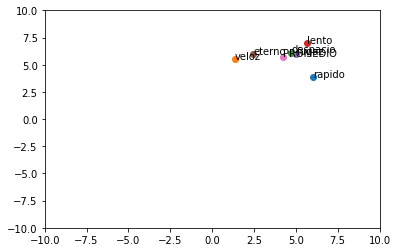

In [ ]:
plt.axis([-10,10,-10,10])
for i in range(len(palabras)):
    plt.scatter(incrustaciones_96[0,i],incrustaciones_96[1,i])
    plt.text(incrustaciones_96[0,i],incrustaciones_96[1,i],palabras[i])
plt.scatter(promedio[0],promedio[1])
plt.text(promedio[0],promedio[1],'PROMEDIO')


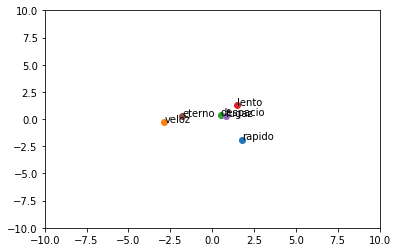

In [ ]:
datos_centrados = incrustaciones_96 - promedio.reshape(num_coord,1)
plt.axis([-10,10,-10,10])
for i in range(len(palabras)):
    plt.scatter(datos_centrados[0,i],datos_centrados[1,i])
    plt.text(datos_centrados[0,i],datos_centrados[1,i],palabras[i])

In [ ]:
datos_centrados[:2,:]

array([[ 1.8092885 , -2.8481035 ,  0.5269561 ,  1.4682565 ,  0.813725  ,
        -1.7701235 ],
       [-1.8886096 , -0.25701427,  0.37586784,  1.284862  ,  0.23757935,
         0.24731064]], dtype=float32)

In [ ]:
normas=np.linalg.norm(datos_centrados[:2,:],axis=0) # Se obriene la norma de cada vector
normas

array([2.6154103 , 2.8596766 , 0.64727074, 1.9510632 , 0.8476982 ,
       1.7873163 ], dtype=float32)

In [ ]:
palabras

['rapido', 'veloz', 'despacio', 'lento', 'fugaz', 'eterno']

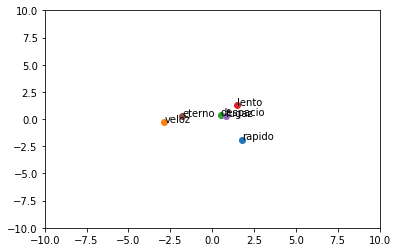

In [ ]:
datos_centrados = incrustaciones_96 - promedio.reshape(num_coord,1)
plt.axis([-10,10,-10,10])
for i in range(len(palabras)):
    plt.scatter(datos_centrados[0,i],datos_centrados[1,i])
    plt.text(datos_centrados[0,i],datos_centrados[1,i],palabras[i])

In [ ]:
datos_centrados[:2,:]

array([[ 1.8092885 , -2.8481035 ,  0.5269561 ,  1.4682565 ,  0.813725  ,
        -1.7701235 ],
       [-1.8886096 , -0.25701427,  0.37586784,  1.284862  ,  0.23757935,
         0.24731064]], dtype=float32)

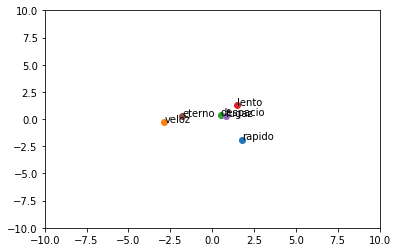

In [ ]:
datos_centrados = incrustaciones_96 - promedio.reshape(num_coord,1)
plt.axis([-10,10,-10,10])
for i in range(len(palabras)):
    plt.scatter(datos_centrados[0,i],datos_centrados[1,i])
    plt.text(datos_centrados[0,i],datos_centrados[1,i],palabras[i])

In [ ]:
varianza=1/(num_puntos-1)*np.linalg.norm(datos_centrados[:2,:],axis=1)**2 # Se obriene la varianza muestral https://youtu.be/__NwvXa3zjQ?t=624
varianza

array([3.5228329, 1.1085314], dtype=float32)

In [ ]:
varianza_0 = 1/(num_puntos-1)*datos_centrados[0,:] @ datos_centrados[0,:].T
varianza_0

3.5228329

In [ ]:
varianza_1 = 1/(num_puntos-1)*datos_centrados[1,:] @ datos_centrados[1,:].T
varianza_1

1.1085312

In [ ]:
covarianza_01 = 1/(num_puntos-1)*datos_centrados[0,:] @ datos_centrados[1,:].T
covarianza_01

-0.16898194

In [ ]:
covarianza_10 = 1/(num_puntos-1)*datos_centrados[1,:] @ datos_centrados[0,:].T
covarianza_10

-0.16898195

In [ ]:
1/(num_puntos-1)*datos_centrados[:2,:] @ datos_centrados[:2,:].T

array([[ 3.5228329 , -0.16898198],
       [-0.16898201,  1.1085312 ]], dtype=float32)

In [ ]:
cov_mat=np.cov(datos_centrados[:2,:] )
cov_mat

array([[ 3.52283277, -0.16898194],
       [-0.16898194,  1.10853127]])

In [ ]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
eigen_values

array([1.09676125, 3.53460279])

In [ ]:
eigen_vectors

array([[-0.06948415, -0.99758306],
       [-0.99758306,  0.06948415]])

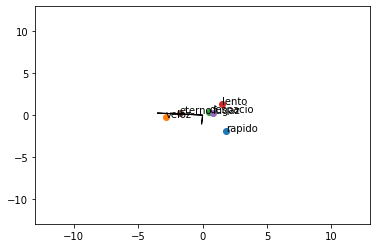

In [ ]:
plt.axis([-13,13,-13,13])
for i in range(len(palabras)):
    plt.scatter(datos_centrados[0,i],datos_centrados[1,i])
    plt.text(datos_centrados[0,i],datos_centrados[1,i],palabras[i])
plt.arrow(0, 0, eigen_values[0]*eigen_vectors[0,0], eigen_values[0]*eigen_vectors[1,0])
plt.arrow(0, 0, eigen_values[1]*eigen_vectors[0,1], eigen_values[1]*eigen_vectors[1,1])


# PCA para proyectar de 3 dimensiones a 2 dimensiones 

In [ ]:
cov_mat_3D=np.cov(datos_centrados[:3,:] )
cov_mat

array([[ 3.52283277, -0.16898194],
       [-0.16898194,  1.10853127]])

In [ ]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat_3D)
eigen_values

array([1.09521639, 2.01357898, 4.12524179])

In [ ]:
eigen_vectors

array([[ 0.05516109,  0.53001043, -0.84619513],
       [ 0.99779906,  0.0019749 ,  0.06628069],
       [ 0.0368006 , -0.84798883, -0.52873497]])

In [ ]:

fig,ax=ejes3d(-10,-10,-10,10,10,10) 
for i in range(len(palabras)):
    punto3d(ax,datos_centrados[:3,i],nombre=palabras[i])  # Coloca el punto
ax.plot((0,eigen_values[0]*eigen_vectors[0,0]),
        (0,eigen_values[0]*eigen_vectors[1,0]),
        (0,eigen_values[0]*eigen_vectors[2,0]))
ax.plot((0,eigen_values[1]*eigen_vectors[0,1]),
        (0,eigen_values[1]*eigen_vectors[1,1]),
        (0,eigen_values[1]*eigen_vectors[2,1]))
ax.plot((0,eigen_values[2]*eigen_vectors[0,2]),
        (0,eigen_values[2]*eigen_vectors[1,2]),
        (0,eigen_values[2]*eigen_vectors[2,2]))
animacion3d(fig,ax)  # Genera la animación para rot

In [ ]:
sorted_index = np.argsort(eigen_values)[::-1]
#sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
eigenvector_subset = sorted_eigenvectors[:,0:2] # Se reduce a 2 dimensiones
puntos_2dim = eigenvector_subset.transpose() @ datos_centrados[:3,:]
puntos_2dim

array([[-1.8035302 ,  1.8095927 , -0.31149254, -1.48968184, -1.35760084,
         3.1527135 ],
       [ 0.71890589, -2.4457309 ,  0.45565515,  0.24760419, -0.6664992 ,
         1.69006477]])

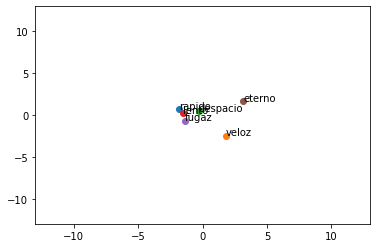

In [ ]:
plt.axis([-13,13,-13,13])
for i in range(len(palabras)):
    plt.scatter(puntos_2dim[0,i],puntos_2dim[1,i])
    plt.text(puntos_2dim[0,i],puntos_2dim[1,i],palabras[i])


# PCA para proyectar de 96 dimensiones a 2 dimensiones 

In [ ]:
# PCA para proyectar de 96 dimensiones a 2 dimensiones 

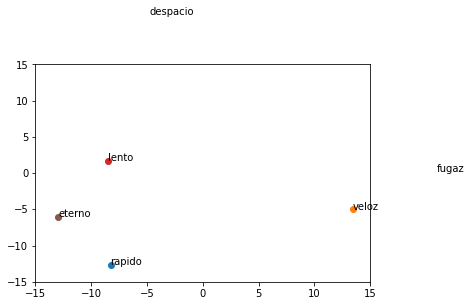

In [ ]:
cov_mat_96D=np.cov(datos_centrados )
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat_96D)
sorted_index = np.argsort(eigen_values)[::-1]
#sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
eigenvector_subset = sorted_eigenvectors[:,0:2] # Se reduce a 2 dimensiones
puntos_2dim = eigenvector_subset.transpose() @ datos_centrados
plt.axis([-15,15,-15,15])
for i in range(len(palabras)):
    plt.scatter(puntos_2dim[0,i],puntos_2dim[1,i])
    plt.text(puntos_2dim[0,i],puntos_2dim[1,i],palabras[i])


In [ ]:
puntos_2dim

array([[ -8.26250146,  13.4626069 ,  -4.77765421,  -8.46371773,
         20.96992246, -12.92865649],
       [-12.63801351,  -5.02045363,  21.80293424,   1.72558506,
          0.17837408,  -6.04842766]])